In [5]:
import numpy as np 
from qiskit import QuantumRegister, ClassicalRegister,QuantumCircuit, transpile, Aer
from qiskit.providers.aer import QasmSimulator
from Hamming import *
import qiskit
%matplotlib inline

In [6]:
def HammingCircuit(N,ClassicalRegisters=None,ancillas=1):
    """
    -Returns a circuit with just the qbits labeled as the parity and signal
    -it gives you a circuit with 2^N qbits of (message + redundancy)
    -it can have classical registers if you want set ClassicalRegisters=True, if given a int "n" it will have 
    n classical registers
    by default it will have N ancillas, if specified it will have a numer N*ancillas"""
    registers=[]
    for i in range(2**N):
        prefix='s' #s stands for signal
        if i==0 or np.log2(i)==int(np.log2(i)): prefix='p' #c stands for parity
        registers.append(QuantumRegister(1,prefix+num_to_binary(i, N)))
    if ClassicalRegisters!=None: 
        if ClassicalRegisters==True: registers.append(ClassicalRegister(2**N+N*ancillas))
        else: registers.append(ClassicalRegister(ClassicalRegisters))
    circuit=QuantumCircuit(*registers,QuantumRegister(ancillas,'anc')) #circuit already with ancillas
    #circit=QuantumCircuit(*registers)
    circuit.N=N
    return circuit

In [7]:
N = 3
circuit=HammingCircuit(N, True, ancillas=N)
circuit.h(list(range(2**N - N - 1)))
circuit.append(hamming_encode(N), list(range(2**N)))

not_power_2 = [i for i in range(2**N) if not is_power_2(i)]
circuit.append(HammingGate0(N), list(range(2**N+N)))
circuit.h(not_power_2)
circuit.measure(not_power_2, not_power_2)
print(circuit.draw())

        ┌───┐┌─────────────────┐┌────────────┐                 
p000_0: ┤ H ├┤0                ├┤0           ├─────────────────
        ├───┤│                 ││            │                 
p001_0: ┤ H ├┤1                ├┤1           ├─────────────────
        ├───┤│                 ││            │                 
p010_0: ┤ H ├┤2                ├┤2           ├─────────────────
        ├───┤│                 ││            │┌───┐┌─┐         
s011_0: ┤ H ├┤3                ├┤3           ├┤ H ├┤M├─────────
        └───┘│  Hamming encode ││            │└───┘└╥┘         
p100_0: ─────┤4                ├┤4           ├──────╫──────────
             │                 ││            │┌───┐ ║ ┌─┐      
s101_0: ─────┤5                ├┤5  Hamming0 ├┤ H ├─╫─┤M├──────
             │                 ││            │├───┤ ║ └╥┘┌─┐   
s110_0: ─────┤6                ├┤6           ├┤ H ├─╫──╫─┤M├───
             │                 ││            │├───┤ ║  ║ └╥┘┌─┐
s111_0: ─────┤7                ├┤7      

In [12]:
N = 4
circuit=HammingCircuit(N, True, ancillas=3*N + 1)

circuit.x(0)
circuit.x(1)
circuit.x(2)
circuit.x(3)
circuit.append(hamming_encode(N), list(range(2**(N))))
circuit.append(hamming_encode(N), list(range(2**N)))

not_power_2 = [i for i in range(2**N) if not is_power_2(i)]
circuit.h(list(range(2**N)))
circuit.y(6)
circuit.h(list(range(2**N)))
circuit.append(HammingGate0(N), list(range(2**N+N)))

circuit.append(HammingGate0(N), [*not_power_2, *list(range(2**N+N, 2**N+3*N+1))])

#circuit.measure(not_power_2, not_power_2)
circuit.measure([7,10,11,12],[0,1,2,3])
print(circuit.draw())

         ┌───┐┌──────────────────┐┌──────────────────┐┌───┐┌───┐     »
p0000_0: ┤ X ├┤0                 ├┤0                 ├┤ H ├┤ H ├─────»
         ├───┤│                  ││                  │├───┤├───┤     »
p0001_0: ┤ X ├┤1                 ├┤1                 ├┤ H ├┤ H ├─────»
         ├───┤│                  ││                  │├───┤├───┤     »
p0010_0: ┤ X ├┤2                 ├┤2                 ├┤ H ├┤ H ├─────»
         ├───┤│                  ││                  │├───┤├───┤     »
s0011_0: ┤ X ├┤3                 ├┤3                 ├┤ H ├┤ H ├─────»
         └───┘│                  ││                  │├───┤├───┤     »
p0100_0: ─────┤4                 ├┤4                 ├┤ H ├┤ H ├─────»
              │                  ││                  │├───┤├───┤     »
s0101_0: ─────┤5                 ├┤5                 ├┤ H ├┤ H ├─────»
              │                  ││                  │├───┤├───┤┌───┐»
s0110_0: ─────┤6                 ├┤6                 ├┤ H ├┤ Y ├┤ H ├»
      

In [ ]:
N
2*N

3*N

In [9]:
simulator = Aer.get_backend("qasm_simulator")
result = qiskit.execute(circuit, backend = simulator, shots=1).result()


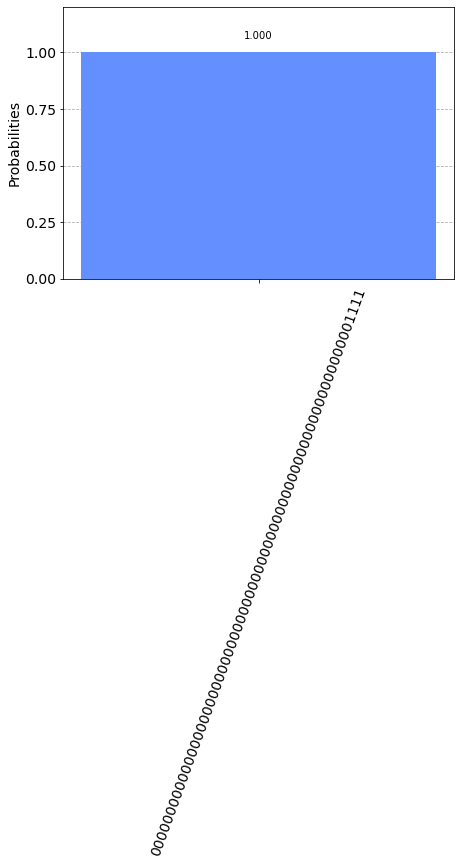

In [10]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))